## Ciphertext

In [1]:
ciphertext = '''XUMKZIKZISMCLVVKEWIEMGEEVVMYAFIYMIFRSZMITARVKGXRSGWXOITUMXYAGUQTQSHRDKXOTRLGZD YFMJ UN XUM KMRPL BU YIH GEKZTMRBN OERGCXK TS CZUFEGG KUYMIEKOML HVXRAMEGQI MNH ZQRUTEEG IAMQHVOOAXVWT QNMTUG IAW VVBQNXRL HK TLR OKDMEA MTSIRRMX MRXUCX ECLRZHUUW NB ZTE IAL UR WSETJ IAV V MGDLC ZWJQLW JMXQ UWRL IAMQRZIUAPYG GZD EQWVFEH OG SULMGIXK ARQ OUHEVAUKZT WRZBUCIF WL EEZRZGX CSHVZDIIF UUET RBBGNLC AIFU GIEUGZY FRNUDE EAL JGRMAO CARPQ EGD IM FMBQREY LORFIEMTF ERVOSM MSQMRE WIEM VDOHHKKP BYG BNQ GIEUGZ MMYQZMRC ZWJQLW NZK FHI ZWYF CSZUUZLC EMIAGRVAKP HSJMBQR NNXGZEWR ITP IXNTOMN QBLKXS LNDK NEIA CYQD
MA CYQ TLR MTUGQN ZKCUMEMJ M LMFB UR DEVTE WEC FMZFIRTA GZD EHFOXIEEG JACYZMTFS XUM VDOGRLADEW SWX SEVZIT ZAZNT KZIKZI CQRI ZWXQ EPNJUDAXR ITP MSEM YQCYEM ZTAR GPUEE MA WZTEV FMXHIGRA TMVC PWJQBSBSY IEVR XXUNXRL OZ RIQ EGFEV-FWRGBPR QTW OR CQTW PECMX EO XUIZ FHIL KUGLH RIYULC OM JQSXEWEQD MS BNQY ARZK QNHNVMQRIQ

QT SEVZIT YIPVBGDY TEIIFIGR KUYMYAQIMTMBVY IEVR LOHIHRL OZTS FMVMREGM TQTABZQE EEPP AEIRT LORFIEMTF SIGBOZGW GPKEE GBUSGNMPIZUOR AMZE WIEM ZQRQRL QQYW NB HXEXPPRQY TNZQ MNH JMXQ AWFQMZEH PWJQ NEZMY EUGU IY DEH PPGRFMAKN MNH FPGDK INKN GNMG WVQREGQTS IR N VKFWSES CMS EFAOSNIQ I YQTXVVME LMFB LAR MGA KZIKZI LAR E CMXUOH BN ZUMI SWX M MIFAGSE XB JK OOVEMIFLC RVIDYTGMJ MNH QMIDYTGMJ NOXU AKZDIE ITP RIPMOHEV UIJ FO GBVLUGYEM ZTEME MTUGQN QT FHI FISQ WEL ZUFOV FMRQCXVWT MNH BZJQR WGIXFIRT XUEIXVWT MNH CTASBSNZJ OORAMIFISAA SGSX OM OPERGQIML EYT ZTEWR AKFTMAOY FOKRBNQR XUM QQY MA UUPEVA BKDMW JMXQ EWGIHXIWUMJ NEJBZKTARQ LOETVVJAFEH VV IADIOWUWS

XUWASH IAQMYA LNL YAMI PZEBTSTZGBHMP EKMKRRAYQS MA XXMCXVKK UT ANA MQRQNV VDOGRLADAP STGIS SCMXMTSE UOETEXMY RAMYCXQ TS FGYFEQNBOOAPYG OZTVBLAOE GUITSEW VV KZCMCPKDMIAB VDOGRLADEW NVJ MLPVMJ OATGCXQ OJ XME FAFYMY MNH UIXPWEEM ZTAX QCXUNK GPK IAV RVGNLIQ IRXIIQ KXKPXBTUSIWGA ZA SYPKKQD

MGQYNEPVMBQDXUIZOREPSOZGIAQMYATBBKZTMNTRKERQMJIWMVBCAYINZYQAVYQKD'''

## Clean up ciphertext

In [2]:
import string

ciphertext = ''.join([c for c in ciphertext if c in string.ascii_uppercase])

## Try to find keylength
Write out the ciphertext n times starting with the 1th, 2th, ..., nth character.
```
1. X  U  M (K) Z (I)
2. U  M  K  Z  I  K
3. M  K  Z  I  K  Z
4. K  Z  I (K) Z (I)
```

Now, for every line, count the columns which contains the same character as the first line.

In [3]:
collisions = []

for offset in range(1, 100):    
    count = sum([ord(ciphertext[i]) - ord(ciphertext[offset:][i]) == 0 for i in range(len(ciphertext) - offset)])
    
    collisions.append(count)

## Visualize collision counts

In [4]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

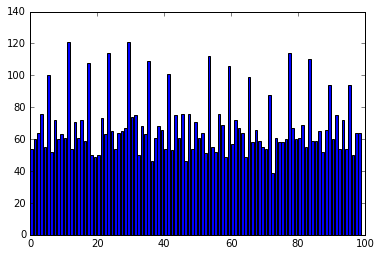

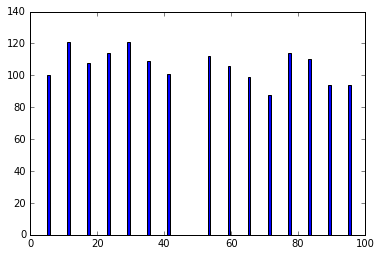

In [5]:
plt.bar(range(len(collisions)), collisions)
plt.show()

most_often = [0 if count < 80 else count for count in collisions]

plt.bar(range(len(most_often)), most_often)
plt.show()

## How frequently does a large number of collisions occur?
We count the peaks and average their distance between eachother.

In [6]:
dists = []
last = 0

for i in range(len(most_often)):
    if most_often[i] >= 80:
        dists.append(i - last)
        last = i
        
keylength = round(sum(dists)/len(dists))

## The keylength is probably:

In [7]:
keylength

6

## Every character separated by keylength belongs to the same alphabet

In [8]:
texts = []

for i in range(keylength):
    texts.append(ciphertext[i::keylength])

## Find the letter frequencies for each text

In [9]:
from collections import OrderedDict

freqs = []

for i in range(keylength):
    freq = OrderedDict()
    
    for c in string.ascii_uppercase:
        freq[c] = texts[i].count(c)
        
    freqs.append(freq)

In [10]:
LEN_ALPHA = len(string.ascii_uppercase)

## Visualize letter frequencies

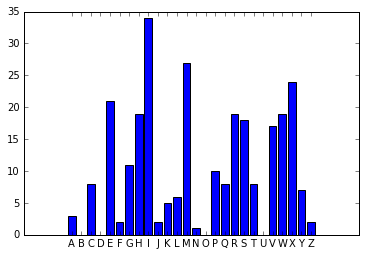

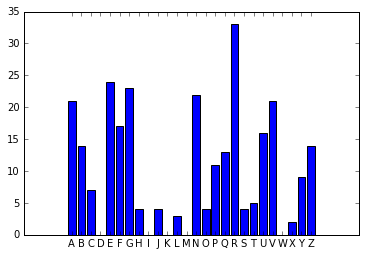

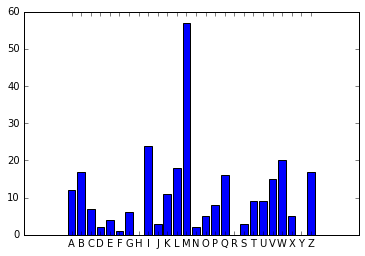

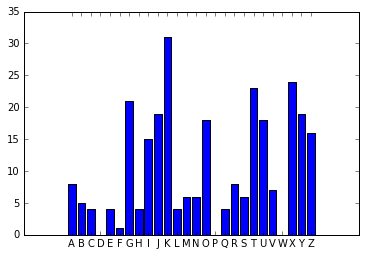

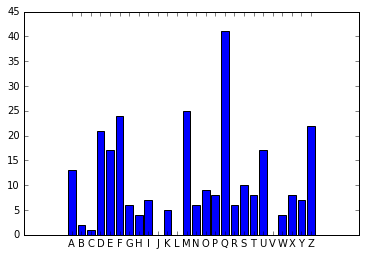

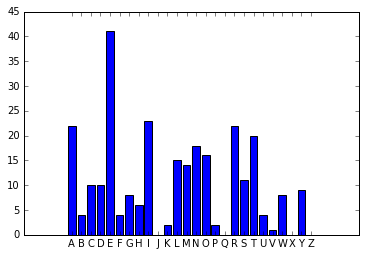

In [11]:
for i in range(keylength):    
    plt.bar(range(LEN_ALPHA), freqs[i].values(), align='center')
    plt.xticks(range(LEN_ALPHA), freqs[i].keys())

    plt.show()

## Calculate the shift of the alphabets
We know that the alphabets are just shifted by some number.
We assume that the most frequent letter is 'E'.

In [12]:
shifts = [LEN_ALPHA - (ord(max(freqs[i], key=freqs[i].get)) - ord('E')) for i in range(keylength)]

In [13]:
shifts

[22, 13, 18, 20, 14, 26]

In [14]:
def rotate(alpha, shift):
    return alpha[shift:] + alpha[:shift]

## Create the alphabets needed

In [15]:
alphas = [rotate(string.ascii_uppercase, shift) for shift in shifts]
alphas

['WXYZABCDEFGHIJKLMNOPQRSTUV',
 'NOPQRSTUVWXYZABCDEFGHIJKLM',
 'STUVWXYZABCDEFGHIJKLMNOPQR',
 'UVWXYZABCDEFGHIJKLMNOPQRST',
 'OPQRSTUVWXYZABCDEFGHIJKLMN',
 'ABCDEFGHIJKLMNOPQRSTUVWXYZ']

## For each character from the ciphertext substitute with the matching alphabet

In [16]:
current = 0

plaintext = ""

for c in ciphertext:
    plaintext += alphas[current][string.ascii_uppercase.find(c)]
    current = (current + 1) % keylength

## Look at the plaintext
If some letters don't seem to match, make manual adjustments to the alphabets.

In [17]:
plaintext

'THEENIGMAMACHINESWEREASERIESOFELECTROMECHANICALROTORCIPHERMACHINESDEVELOPEDANDUSEDINTHEEARLYTOMIDTWENTIETHCENTURYTOPROTECTCOMMERCIALDIPLOMATICANDMILITARYCOMMUNICATIONENIGMAWASINVENTEDBYTHEGERMANENGINEERARTHURSCHERBIUSATTHEENDOFWORLDWARIEARLYMODELSWEREUSEDCOMMERCIALLYANDADOPTEDBYMILITARYANDGOVERNMENTSERVICESOFSEVERALCOUNTRIESMOSTNOTABLYNAZIGERMANYBEFOREANDDURINGWORLDWARIISEVERALDIFFERENTENIGMAMODELSWEREPRODUCEDBUTTHEGERMANMILITARYMODELSARETHEMOSTCOMMONLYRECOGNISEDHOWEVERJAPANESEANDITALIANMODELSHAVEBEENUSEDINUSETHEENIGMAREQUIREDALISTOFDAILYKEYSETTINGSANDAUXILIARYDOCUMENTSTHEPROCEDURESFORGERMANNAVALENIGMAWEREMOREELABORATEANDMORESECURETHANTHOSEINOTHERSERVICESNAVYCODEBOOKSWEREPRINTEDINREDWATERSOLUBLEINKONPINKPAPERSOTHATTHEYCOULDEASILYBEDESTROYEDIFTHEYWEREENDANGEREDINGERMANMILITARYPRACTICECOMMUNICATIONSWEREDIVIDEDINTOSEPARATENETWORKSEACHUSINGDIFFERENTSETTINGSTHESECOMMUNICATIONNETSWERETERMEDKEYSATBLETCHLEYPARKANDWEREASSIGNEDCODENAMESSUCHASREDCHAFFINCHANDSHARKEACHUNITOPERATINGINANETWORKWASASS

## Extract the actual key used
Just look at the difference between the first letters of the ciphertext and plaintext.

In [18]:
key = ""

for i in range(keylength):
     key += chr(ord(ciphertext[i]) - ord(plaintext[i]) + ord('A'))

In [19]:
key

'ENIGMA'